In [12]:
# imports
import pandas as pd
import numpy as np
#import seborn
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 

In [13]:
# import data
data = pd.read_csv("accepted_2007_to_2018Q4.csv", engine='c')
data = data.drop(['id', 'member_id', 'settlement_term','settlement_percentage', 'settlement_amount', 'settlement_date','settlement_status', 'debt_settlement_flag_date', 'hardship_last_payment_amount', 'hardship_payoff_balance_amount', 'orig_projected_additional_accrued_interest',
           'hardship_loan_status', 'hardship_dpd', 'hardship_length','payment_plan_start_date','hardship_end_date', 'hardship_start_date', 'hardship_amount', 'deferral_term', 'hardship_status', 'hardship_reason', 'hardship_type',
           'sec_app_mths_since_last_major_derog', 'sec_app_collections_12_mths_ex_med', 'sec_app_chargeoff_within_12_mths', 'sec_app_num_rev_accts', 'sec_app_open_act_il', 'sec_app_revol_util', 'sec_app_open_acc', 'sec_app_mort_acc',
           'sec_app_inq_last_6mths', 'sec_app_earliest_cr_line', 'sec_app_fico_range_high', 'sec_app_fico_range_low', 'verification_status_joint', 'dti_joint', 'annual_inc_joint', 'desc', 'url', 'revol_bal_joint','mths_since_last_record', 'mths_since_recent_bc_dlq', 'mths_since_last_major_derog', 'mths_since_recent_revol_delinq', 'next_pymnt_d',
           'il_util', 'mths_since_rcnt_il','mths_since_last_delinq', 'zip_code', 'last_pymnt_d','emp_title','funded_amnt', 'funded_amnt_inv', 'sub_grade', 'collection_recovery_fee', 'fico_range_low', 'num_sats', 'total_pymnt_inv', 'total_rec_prncp', 'tot_hi_cred_lim', 'total_il_high_credit_limit', 'num_rev_tl_bal_gt_0', 'last_fico_range_low',
           'addr_state', 'pymnt_plan'], axis=1)

#data = data.dropna()
#data
# maybe takeout these features as well:
# debt_settlement_flag

# i hhave removed addr_state because it has 50 differetn values / states it can take and it is iinfeasiable for the BN and the state the person is from should not be a determining factor of their loan status

# i have removed pymnt_plan since all entries have the state, so theres no information here that will influence / contibute to the BN

# I have left 'hardship_flag' included

# features removed on the second round of cleaning after looking at amount of missing rows in excel
#'mths_since_last_record', 'mths_since_recent_bc_dlq', 'mths_since_last_major_derog', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'mths_since_last_delinq'

# i removed zip codes since i couldnt categorize or group areas toghether, since the zip codes were obscured/sensored / hidden the original value

# i removed 'last_payment_d' as i dont this its necessary and since iit would mostly apply to rows where loan status = current 

# idk what 'il_util' is but i removed it

# features i removed after looking at the correlation grid/ heatmap
# 'funded_amnt', 'funded_amnt_inv', 'sub_grade', 'collection_recovery_fee', 'fico_range_low', 'num_sats', 'total_pymnt_inv', 'total_rec_prncp', 'tot_hi_cred_lim', 'total_il_high_credit_limit', 'num_rev_tl_bal_gt_0', 'last_fico_range_low'
 
data.convert_dtypes()
data.dtypes
display(data)

C:\Users\zachs\AppData\Local\Temp\ipykernel_21788\1350759982.py:2: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("accepted_2007_to_2018Q4.csv", engine='c')


,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,3600.0,36 months,13.99,123.03,C,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,...,3.0,76.9,0.0,0.0,0.0,7746.0,2400.0,N,Cash,N
1,24700.0,36 months,11.99,820.28,C,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,...,2.0,97.4,7.7,0.0,0.0,39475.0,79300.0,N,Cash,N
2,20000.0,60 months,10.78,432.66,B,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,...,0.0,100.0,50.0,0.0,0.0,18696.0,6200.0,N,Cash,N
3,35000.0,60 months,14.85,829.90,C,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,...,1.0,100.0,0.0,0.0,0.0,52226.0,62500.0,N,Cash,N
4,10400.0,60 months,22.45,289.91,F,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,...,4.0,96.6,60.0,0.0,0.0,95768.0,20300.0,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,40000.0,60 months,10.49,859.56,B,9 years,MORTGAGE,227000.0,Verified,Oct-2016,...,0.0,75.7,50.0,0.0,0.0,28398.0,12300.0,N,Cash,N
2260697,24000.0,60 months,14.49,564.56,C,6 years,RENT,110000.0,Not Verified,Oct-2016,...,1.0,96.2,40.0,1.0,0.0,62426.0,20700.0,N,Cash,Y
2260698,14000.0,60 months,14.49,329.33,C,10+ years,MORTGAGE,95000.0,Verified,Oct-2016,...,1.0,81.8,50.0,0.0,0.0,44215.0,9500.0,N,Cash,N
2260699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Analysis on missing data:
# sort columns by amount of missing data in them

# Count the number of missing values in each column
missing_counts = data.isnull().sum().sort_values(ascending=False)

display(missing_counts)

# Sort columns by the number of missing values in descending order
sorted_columns = missing_counts.sort_values(ascending=False).index

# Reorder the DataFrame columns based on the sorted order
sorted_df = data[sorted_columns]

# sorted_df now contains the DataFrame with columns sorted by missing values
display(sorted_df)

all_util                866381
total_cu_tl             866163
open_acc_6m             866163
inq_last_12m            866163
open_act_il             866162
                         ...  
recoveries                  33
last_pymnt_amnt             33
last_fico_range_high        33
policy_code                 33
debt_settlement_flag        33
Length: 86, dtype: int64

,all_util,open_acc_6m,inq_last_12m,total_cu_tl,open_rv_24m,total_bal_il,max_bal_bc,inq_fi,open_rv_12m,open_il_24m,...,verification_status,home_ownership,grade,installment,revol_bal,term,loan_amnt,disbursement_method,hardship_flag,debt_settlement_flag
0,34.0,2.0,4.0,1.0,3.0,4981.0,722.0,3.0,3.0,1.0,...,Not Verified,MORTGAGE,C,123.03,2765.0,36 months,3600.0,Cash,N,N
1,29.0,1.0,6.0,0.0,3.0,18005.0,6472.0,0.0,2.0,1.0,...,Not Verified,MORTGAGE,C,820.28,21470.0,36 months,24700.0,Cash,N,N
2,65.0,0.0,1.0,5.0,2.0,10827.0,2081.0,2.0,0.0,4.0,...,Not Verified,MORTGAGE,B,432.66,7869.0,60 months,20000.0,Cash,N,N
3,45.0,1.0,0.0,1.0,1.0,12609.0,6987.0,0.0,1.0,1.0,...,Source Verified,MORTGAGE,C,829.90,7802.0,60 months,35000.0,Cash,N,N
4,78.0,1.0,3.0,1.0,7.0,73839.0,9702.0,2.0,4.0,3.0,...,Source Verified,MORTGAGE,F,289.91,21929.0,60 months,10400.0,Cash,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,51.0,0.0,2.0,0.0,0.0,19765.0,5141.0,3.0,0.0,1.0,...,Verified,MORTGAGE,B,859.56,8633.0,60 months,40000.0,Cash,N,N
2260697,73.0,0.0,1.0,0.0,5.0,44785.0,6172.0,0.0,1.0,2.0,...,Not Verified,RENT,C,564.56,17641.0,60 months,24000.0,Cash,N,Y
2260698,84.0,0.0,2.0,1.0,1.0,32071.0,4093.0,3.0,0.0,2.0,...,Verified,MORTGAGE,C,329.33,7662.0,60 months,14000.0,Cash,N,N
2260699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Analysis on missing data:
# sort rows by amount of missing data in them

# Count the number of missing values in each row
missing_counts_rows = data.isnull().sum(axis=1).sort_values(ascending=False)

# Sort rows by the number of missing values in descending order
sorted_df_rows = data.loc[missing_counts_rows.sort_values(ascending=False).index]
# sorted_df now contains the DataFrame with rows sorted by missing values
display(missing_counts_rows)
display(sorted_df_rows)

2260700    86
421095     86
1654416    86
1654415    86
1651665    86
           ..
500573      0
500576      0
500580      0
500581      0
0           0
Length: 2260701, dtype: int64

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,hardship_flag,disbursement_method,debt_settlement_flag
2260700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1939379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
983169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
877717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
877716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038322,15000.0,36 months,12.79,503.90,C,< 1 year,MORTGAGE,66000.0,Source Verified,Jul-2016,...,3.0,94.4,0.0,0.0,0.0,125299.0,8800.0,N,Cash,N
2038323,19200.0,36 months,10.49,623.96,B,2 years,RENT,72000.0,Source Verified,Jul-2016,...,0.0,100.0,66.7,0.0,0.0,173251.0,19500.0,N,Cash,N
2038324,13000.0,36 months,9.49,416.37,B,4 years,RENT,60000.0,Verified,Jul-2016,...,1.0,80.8,100.0,0.0,0.0,52352.0,10000.0,N,Cash,N
2038325,6000.0,36 months,8.99,190.78,B,3 years,MORTGAGE,125000.0,Not Verified,Jul-2016,...,7.0,100.0,50.0,1.0,0.0,119753.0,10400.0,N,Cash,N


In [16]:
#data_droppedna = data.dropna(thresh=82)
data_droppedna = data.dropna(thresh=83)
display(data_droppedna)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,3600.0,36 months,13.99,123.03,C,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,...,3.0,76.9,0.0,0.0,0.0,7746.0,2400.0,N,Cash,N
1,24700.0,36 months,11.99,820.28,C,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,...,2.0,97.4,7.7,0.0,0.0,39475.0,79300.0,N,Cash,N
2,20000.0,60 months,10.78,432.66,B,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,...,0.0,100.0,50.0,0.0,0.0,18696.0,6200.0,N,Cash,N
3,35000.0,60 months,14.85,829.90,C,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,...,1.0,100.0,0.0,0.0,0.0,52226.0,62500.0,N,Cash,N
4,10400.0,60 months,22.45,289.91,F,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,...,4.0,96.6,60.0,0.0,0.0,95768.0,20300.0,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260693,24000.0,60 months,10.49,515.74,B,4 years,OWN,125000.0,Not Verified,Oct-2016,...,5.0,100.0,0.0,0.0,2.0,31320.0,93700.0,N,Cash,N
2260695,24000.0,60 months,10.49,515.74,B,10+ years,MORTGAGE,108000.0,Not Verified,Oct-2016,...,0.0,75.9,42.9,0.0,1.0,140118.0,27900.0,N,Cash,N
2260696,40000.0,60 months,10.49,859.56,B,9 years,MORTGAGE,227000.0,Verified,Oct-2016,...,0.0,75.7,50.0,0.0,0.0,28398.0,12300.0,N,Cash,N
2260697,24000.0,60 months,14.49,564.56,C,6 years,RENT,110000.0,Not Verified,Oct-2016,...,1.0,96.2,40.0,1.0,0.0,62426.0,20700.0,N,Cash,Y


In [17]:
# Analysis on missing data:
# sort rows by amount of missing data in them

# Count the number of missing values in each row
missing_counts_rows_dropped = data_droppedna.isnull().sum(axis=1).sort_values(ascending=False)

# Sort rows by the number of missing values in descending order
sorted_df_rows_dropped = data_droppedna.loc[missing_counts_rows_dropped.sort_values(ascending=False).index]
# sorted_df now contains the DataFrame with rows sorted by missing values
display(missing_counts_rows_dropped)
display(sorted_df_rows_dropped)

1413938    3
2221900    3
2148557    3
1531737    3
577095     3
          ..
1063388    0
1063389    0
1063390    0
1063391    0
0          0
Length: 1377861, dtype: int64

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,hardship_flag,disbursement_method,debt_settlement_flag
1413938,18000.0,36 months,18.94,659.27,D,NaN,OWN,20696.0,Not Verified,Nov-2018,...,0.0,100.0,0.0,0.0,0.0,4702.0,1500.0,N,Cash,N
1063346,4500.0,36 months,18.99,164.93,D,NaN,RENT,42000.0,Source Verified,Feb-2016,...,4.0,100.0,0.0,2.0,0.0,6649.0,7200.0,N,Cash,N
2211696,9100.0,36 months,15.99,319.89,C,NaN,RENT,26000.0,Verified,Nov-2016,...,5.0,100.0,83.3,0.0,0.0,19238.0,5950.0,N,Cash,N
1063648,12000.0,36 months,5.32,361.38,A,NaN,RENT,30000.0,Verified,Feb-2016,...,0.0,100.0,0.0,0.0,0.0,12065.0,30000.0,N,Cash,N
673879,8275.0,36 months,10.75,269.94,B,NaN,OWN,23040.0,Verified,Jun-2016,...,0.0,88.2,66.7,0.0,0.0,10777.0,11000.0,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13180,14500.0,60 months,13.67,334.92,C,9 years,MORTGAGE,51250.0,Verified,Dec-2015,...,2.0,95.0,16.7,0.0,0.0,41767.0,15200.0,N,Cash,N
2204427,8000.0,36 months,10.49,259.99,B,3 years,RENT,116000.0,Not Verified,Nov-2016,...,1.0,82.4,50.0,0.0,0.0,37537.0,10600.0,N,Cash,N
13182,10000.0,36 months,13.67,340.18,C,1 year,RENT,40000.0,Verified,Dec-2015,...,4.0,100.0,83.3,0.0,0.0,30110.0,17600.0,N,Cash,N
2204429,12000.0,36 months,11.49,395.66,B,< 1 year,RENT,40000.0,Source Verified,Nov-2016,...,2.0,100.0,0.0,1.0,0.0,18403.0,15500.0,N,Cash,N


In [18]:

# apply normalization techniques 
#df_sklearn = data.copy() 
#for column  in df_sklearn.columns:
#    if df_sklearn[column].dtype == np.float64:
#        df_sklearn[column] = MinMaxScaler().fit_transform(np.array(df_sklearn[column]).reshape(-1,1)) 
#display(df_sklearn) 

In [19]:
#discretise Data

discretise_data = data_droppedna.copy() 


standard_num_bins = 5

discretized = pd.cut(discretise_data['loan_amnt'].dropna(), bins= standard_num_bins)
discretized = pd.Series(discretized, index= discretise_data['loan_amnt'].dropna().index)
discretized_full = pd.Series('NaN', index= discretise_data['loan_amnt'].index)
discretized_full.update(discretized)
discretise_data['loan_amnt'] = discretized_full


discretized = pd.cut(discretise_data['int_rate'].dropna(), bins= standard_num_bins)
discretized = pd.Series(discretized, index=discretise_data['int_rate'].dropna().index)
discretized_full = pd.Series('NaN', index= discretise_data['int_rate'].index)
discretized_full.update(discretized)
discretise_data['int_rate'] = discretized_full

discretized = pd.cut(discretise_data['installment'].dropna(), bins= standard_num_bins)
discretized = pd.Series(discretized, index=discretise_data['installment'].dropna().index)
discretized_full = pd.Series('NaN', index= discretise_data['installment'].index)
discretized_full.update(discretized)
discretise_data['installment'] = discretized_full

discretized = discretise_data['emp_length'].dropna()
discretized = pd.Series(discretized, index=discretise_data['emp_length'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['emp_length'].index)
discretized_full.update(discretized)
discretise_data['emp_length'] = discretized_full

discretized = discretise_data['home_ownership'].dropna()
discretized = pd.Series(discretized, index=discretise_data['home_ownership'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['home_ownership'].index)
discretized_full.update(discretized)
discretise_data['home_ownership'] = discretized_full

est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
annual_inc_dataframe =  np.array([discretise_data['annual_inc'].dropna().to_numpy()]).transpose()
est.fit(annual_inc_dataframe)
annual_inc_dataframe = est.transform(annual_inc_dataframe)
discretized = pd.Series(annual_inc_dataframe.reshape(-1), index=discretise_data['annual_inc'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['annual_inc'].index)
discretized_full.update(discretized)
discretise_data['annual_inc'] = discretized_full

discretized = discretise_data['verification_status'].dropna()
discretized = pd.Series(discretized, index=discretise_data['verification_status'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['verification_status'].index)
discretized_full.update(discretized)
discretise_data['verification_status'] = discretized_full


discretise_data['issue_d'] = pd.to_datetime(discretise_data['issue_d'], format='%b-%Y')
discretise_data['issue_d'] = discretise_data['issue_d'].dt.year.astype(int)
discretized = discretise_data['issue_d'].dropna()
discretized = pd.Series(discretized, index=discretise_data['issue_d'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['issue_d'].index)
discretized_full.update(discretized)
discretise_data['issue_d'] = discretized_full

discretise_data['loan_status'] = discretise_data['loan_status'].apply(lambda x: 'Fully Paid' if 'Fully Paid' in x else x)

values_to_keep = ['Fully Paid', 'Charged Off']
pattern = '|'.join(values_to_keep)
discretise_data = discretise_data[discretise_data['loan_status'].str.contains(pattern)]



discretized = discretise_data['purpose'].dropna()
discretized = pd.Series(discretized, index=discretise_data['purpose'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['purpose'].index)
discretized_full.update(discretized)
discretise_data['purpose'] = discretized_full

discretized = discretise_data['title'].dropna()
discretized = pd.Series(discretized, index=discretise_data['title'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['title'].index)
discretized_full.update(discretized)
discretise_data['title'] = discretized_full


est = KBinsDiscretizer(n_bins = standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
dti_dataframe = np.array([discretise_data['dti'].dropna().to_numpy()]).transpose()
est.fit(dti_dataframe)
dti_dataframe = est.transform(dti_dataframe)
discretized = pd.Series(dti_dataframe.reshape(-1), index=discretise_data['dti'].dropna().index)

discretized_full = pd.Series('N/A', index= discretise_data['dti'].index)
discretized_full.update(discretized)
discretise_data['dti'] = discretized_full
#
est = KBinsDiscretizer(n_bins = standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
delinq_2yrs_dataframe = np.array([discretise_data['delinq_2yrs'].dropna().to_numpy()]).transpose()
est.fit(delinq_2yrs_dataframe)
delinq_2yrs_dataframe = est.transform(delinq_2yrs_dataframe)
discretized = pd.Series(delinq_2yrs_dataframe.reshape(-1), index=discretise_data['delinq_2yrs'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['delinq_2yrs'].index)
discretized_full.update(discretized)
discretise_data['delinq_2yrs'] = discretized_full
#
#
discretise_data['earliest_cr_line'] = pd.to_datetime(discretise_data['earliest_cr_line'].apply(lambda x: x.split('-')[1]))
discretized = pd.cut(discretise_data['earliest_cr_line'].dropna(), bins = standard_num_bins)
discretized = pd.Series(discretized, index=discretise_data['earliest_cr_line'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['earliest_cr_line'].index)
discretized_full.update(discretized)
discretise_data['earliest_cr_line'] = discretized_full
#
discretise_data['fico_range_high'] = pd.cut(discretise_data['fico_range_high'], bins= standard_num_bins)
#
est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
inq_last_6mths_dataframe = np.array([discretise_data['inq_last_6mths'].dropna().to_numpy()]).transpose()
est.fit(inq_last_6mths_dataframe)
inq_last_6mths_dataframe = est.transform(inq_last_6mths_dataframe)
discretized = pd.Series(inq_last_6mths_dataframe.reshape(-1), index=discretise_data['inq_last_6mths'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['inq_last_6mths'].index)
discretized_full.update(discretized)
discretise_data['inq_last_6mths'] = discretized_full
#
est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
open_acc_dataframe = pd.DataFrame(discretise_data['open_acc'])
est.fit(open_acc_dataframe)
open_acc_dataframe = est.transform(open_acc_dataframe)
discretise_data['open_acc'] = open_acc_dataframe

est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
pub_rec_dataframe = pd.DataFrame(discretise_data['pub_rec'])
est.fit(pub_rec_dataframe)
pub_rec_dataframe = est.transform(pub_rec_dataframe)
discretise_data['pub_rec'] = pub_rec_dataframe

est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
revol_bal_dataframe = pd.DataFrame(discretise_data['revol_bal'])
est.fit(revol_bal_dataframe)
revol_bal_dataframe = est.transform(revol_bal_dataframe)
discretise_data['revol_bal'] = revol_bal_dataframe
#
est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
revol_util_dataframe = np.array([discretise_data['revol_util'].dropna().to_numpy()]).transpose()
est.fit(revol_util_dataframe)
revol_util_dataframe = est.transform(revol_util_dataframe)
discretized = pd.Series(revol_util_dataframe.reshape(-1), index=discretise_data['revol_util'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['revol_util'].index)
discretized_full.update(discretized)
discretise_data['revol_util'] = discretized_full
#
est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
total_acc_dataframe = pd.DataFrame(discretise_data['total_acc'])
est.fit(total_acc_dataframe)
total_acc_dataframe = est.transform(total_acc_dataframe)
discretise_data['total_acc'] = total_acc_dataframe

discretized = discretise_data['initial_list_status'].dropna()
discretized = pd.Series(discretized, index=discretise_data['initial_list_status'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['initial_list_status'].index)
discretized_full.update(discretized)
discretise_data['initial_list_status'] = discretized_full

est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
out_prncp_dataframe = pd.DataFrame(discretise_data['out_prncp'])
est.fit(out_prncp_dataframe)
out_prncp_dataframe = est.transform(out_prncp_dataframe)
discretise_data['out_prncp'] = out_prncp_dataframe
#
est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
out_prncp_inv_dataframe = pd.DataFrame(discretise_data['out_prncp_inv'])
est.fit(out_prncp_inv_dataframe)
out_prncp_inv_dataframe = est.transform(out_prncp_inv_dataframe)
discretise_data['out_prncp_inv'] = out_prncp_inv_dataframe
#
est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
total_pymnt_dataframe = pd.DataFrame(discretise_data['total_pymnt'])
est.fit(total_pymnt_dataframe)
total_pymnt_dataframe = est.transform(total_pymnt_dataframe)
discretise_data['total_pymnt'] = total_pymnt_dataframe
#
est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
total_rec_int_dataframe = pd.DataFrame(discretise_data['total_rec_int'])
est.fit(total_rec_int_dataframe)
total_rec_int_dataframe = est.transform(total_rec_int_dataframe)
discretise_data['total_rec_int'] = total_rec_int_dataframe
#
est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
total_rec_late_fee_dataframe = pd.DataFrame(discretise_data['total_rec_late_fee'])
est.fit(total_rec_late_fee_dataframe)
total_rec_late_fee_dataframe = est.transform(total_rec_late_fee_dataframe)
discretise_data['total_rec_late_fee'] = total_rec_late_fee_dataframe
#
est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
recoveries_dataframe = pd.DataFrame(discretise_data['recoveries'])
est.fit(recoveries_dataframe)
recoveries_dataframe = est.transform(recoveries_dataframe)
discretise_data['recoveries'] = recoveries_dataframe
#
est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
last_pymnt_amnt_dataframe = np.array([discretise_data['last_pymnt_amnt'].dropna().to_numpy()]).transpose()
est.fit(last_pymnt_amnt_dataframe)
last_pymnt_amnt_dataframe = est.transform(last_pymnt_amnt_dataframe)
discretized = pd.Series(last_pymnt_amnt_dataframe.reshape(-1), index=discretise_data['last_pymnt_amnt'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['last_pymnt_amnt'].index)
discretized_full.update(discretized)
discretise_data['last_pymnt_amnt'] = discretized_full


discretise_data['last_credit_pull_d'] = pd.to_datetime(discretise_data['last_credit_pull_d'], format='%b-%Y')
discretise_data['last_credit_pull_d'] = discretise_data['last_credit_pull_d'].dt.year
discretized = discretise_data['last_credit_pull_d'].dropna()
discretized = pd.Series(discretized, index=discretise_data['last_credit_pull_d'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['last_credit_pull_d'].index)
discretized_full.update(discretized)
discretise_data['last_credit_pull_d'] = discretized_full
#
discretise_data['last_fico_range_high'] = pd.cut(discretise_data['last_fico_range_high'], bins= standard_num_bins)
#
discretise_data['collections_12_mths_ex_med'] = pd.cut(discretise_data['collections_12_mths_ex_med'], bins= standard_num_bins)
#
discretized = discretise_data['policy_code'].dropna()
discretized = pd.Series(discretized, index=discretise_data['policy_code'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['policy_code'].index)
discretized_full.update(discretized)
discretise_data['policy_code'] = discretized_full

discretized = discretise_data['application_type'].dropna()
discretized = pd.Series(discretized, index=discretise_data['application_type'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['application_type'].index)
discretized_full.update(discretized)
discretise_data['application_type'] = discretized_full
#
discretise_data['acc_now_delinq'] = pd.cut(discretise_data['acc_now_delinq'], bins= standard_num_bins)
#
est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
tot_coll_amt_dataframe = pd.DataFrame(discretise_data['tot_coll_amt'])
est.fit(tot_coll_amt_dataframe)
tot_coll_amt_dataframe = est.transform(tot_coll_amt_dataframe)
discretise_data['tot_coll_amt'] = tot_coll_amt_dataframe

est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
tot_cur_bal_dataframe = pd.DataFrame(discretise_data['tot_cur_bal'])
est.fit(tot_cur_bal_dataframe)
tot_cur_bal_dataframe = est.transform(tot_cur_bal_dataframe)
discretise_data['tot_cur_bal'] = tot_cur_bal_dataframe
#
est = KBinsDiscretizer(n_bins=  standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
open_acc_6m_dataframe = np.array([discretise_data['open_acc_6m'].dropna().to_numpy()]).transpose()
est.fit(open_acc_6m_dataframe)
open_acc_6m_dataframe = est.transform(open_acc_6m_dataframe)
discretized = pd.Series(open_acc_6m_dataframe.reshape(-1), index=discretise_data['open_acc_6m'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['open_acc_6m'].index)
discretized_full.update(discretized)
discretise_data['open_acc_6m'] = discretized_full
#


est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
open_act_il_dataframe = np.array([discretise_data['open_act_il'].dropna().to_numpy()]).transpose()
est.fit(open_act_il_dataframe)
open_act_il_dataframe = est.transform(open_act_il_dataframe)
discretized = pd.Series(open_act_il_dataframe.reshape(-1), index=discretise_data['open_act_il'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['open_act_il'].index)
discretized_full.update(discretized)
discretise_data['open_act_il'] = discretized_full

est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
open_il_12m_dataframe = np.array([discretise_data['open_il_12m'].dropna().to_numpy()]).transpose()
est.fit(open_il_12m_dataframe)
open_il_12m_dataframe = est.transform(open_il_12m_dataframe)
discretized = pd.Series(open_il_12m_dataframe.reshape(-1), index=discretise_data['open_il_12m'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['open_il_12m'].index)
discretized_full.update(discretized)
discretise_data['open_il_12m'] = discretized_full

est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
open_il_24m_dataframe = np.array([discretise_data['open_il_24m'].dropna().to_numpy()]).transpose()
est.fit(open_il_24m_dataframe)
open_il_24m_dataframe = est.transform(open_il_24m_dataframe)
discretized = pd.Series(open_il_24m_dataframe.reshape(-1), index=discretise_data['open_il_24m'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['open_il_24m'].index)
discretized_full.update(discretized)
discretise_data['open_il_24m'] = discretized_full
#
est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
total_bal_il_dataframe = np.array([discretise_data['total_bal_il'].dropna().to_numpy()]).transpose()
est.fit(total_bal_il_dataframe)
total_bal_il_dataframe = est.transform(total_bal_il_dataframe)
discretized = pd.Series(total_bal_il_dataframe.reshape(-1), index=discretise_data['total_bal_il'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['total_bal_il'].index)
discretized_full.update(discretized)
discretise_data['total_bal_il'] = discretized_full
#
est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
open_rv_12m_dataframe = np.array([discretise_data['open_rv_12m'].dropna().to_numpy()]).transpose()
est.fit(open_rv_12m_dataframe)
open_rv_12m_dataframe = est.transform(open_rv_12m_dataframe)
discretized = pd.Series(open_rv_12m_dataframe.reshape(-1), index=discretise_data['open_rv_12m'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['open_rv_12m'].index)
discretized_full.update(discretized)
discretise_data['open_rv_12m'] = discretized_full
#
est = KBinsDiscretizer(n_bins= standard_num_bins , encode='ordinal', strategy='kmeans',subsample=200_000)
open_rv_24m_dataframe = np.array([discretise_data['open_rv_24m'].dropna().to_numpy()]).transpose()
est.fit(open_rv_24m_dataframe)
open_rv_24m_dataframe = est.transform(open_rv_24m_dataframe)
discretized = pd.Series(open_rv_24m_dataframe.reshape(-1), index=discretise_data['open_rv_24m'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['open_rv_24m'].index)
discretized_full.update(discretized)
discretise_data['open_rv_24m'] = discretized_full
#
est = KBinsDiscretizer(n_bins= standard_num_bins , encode='ordinal', strategy='kmeans',subsample=200_000)
max_bal_bc_dataframe = np.array([discretise_data['max_bal_bc'].dropna().to_numpy()]).transpose()
est.fit(max_bal_bc_dataframe)
max_bal_bc_dataframe = est.transform(max_bal_bc_dataframe)
discretized = pd.Series(max_bal_bc_dataframe.reshape(-1), index=discretise_data['max_bal_bc'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['max_bal_bc'].index)
discretized_full.update(discretized)
discretise_data['max_bal_bc'] = discretized_full
#
est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
all_util_dataframe = np.array([discretise_data['all_util'].dropna().to_numpy()]).transpose()
est.fit(all_util_dataframe)
all_util_dataframe = est.transform(all_util_dataframe)
discretized = pd.Series(all_util_dataframe.reshape(-1), index=discretise_data['all_util'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['all_util'].index)
discretized_full.update(discretized)
discretise_data['all_util'] = discretized_full

est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
total_rev_hi_lim_dataframe = np.array([discretise_data['total_rev_hi_lim'].dropna().to_numpy()]).transpose()
est.fit(total_rev_hi_lim_dataframe)
total_rev_hi_lim_dataframe = est.transform(total_rev_hi_lim_dataframe)
discretized = pd.Series(total_rev_hi_lim_dataframe.reshape(-1), index=discretise_data['total_rev_hi_lim'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['total_rev_hi_lim'].index)
discretized_full.update(discretized)
discretise_data['total_rev_hi_lim'] = discretized_full

est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
inq_fi_dataframe = np.array([discretise_data['inq_fi'].dropna().to_numpy()]).transpose()
est.fit(inq_fi_dataframe)
inq_fi_dataframe = est.transform(inq_fi_dataframe)
discretized = pd.Series(inq_fi_dataframe.reshape(-1), index=discretise_data['inq_fi'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['inq_fi'].index)
discretized_full.update(discretized)
discretise_data['inq_fi'] = discretized_full
#
est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
total_cu_tl_dataframe = np.array([discretise_data['total_cu_tl'].dropna().to_numpy()]).transpose()
est.fit(total_cu_tl_dataframe)
total_cu_tl_dataframe = est.transform(total_cu_tl_dataframe)
discretized = pd.Series(total_cu_tl_dataframe.reshape(-1), index=discretise_data['total_cu_tl'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['total_cu_tl'].index)
discretized_full.update(discretized)
discretise_data['total_cu_tl'] = discretized_full

est = KBinsDiscretizer(n_bins=  standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
inq_last_12m_dataframe = np.array([discretise_data['inq_last_12m'].dropna().to_numpy()]).transpose()
est.fit(inq_last_12m_dataframe)
inq_last_12m_dataframe = est.transform(inq_last_12m_dataframe)
discretized = pd.Series(inq_last_12m_dataframe.reshape(-1), index=discretise_data['inq_last_12m'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['inq_last_12m'].index)
discretized_full.update(discretized)
discretise_data['inq_last_12m'] = discretized_full
#
est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
acc_open_past_24mths_dataframe = np.array([discretise_data['acc_open_past_24mths'].dropna().to_numpy()]).transpose()
est.fit(acc_open_past_24mths_dataframe)
acc_open_past_24mths_dataframe = est.transform(acc_open_past_24mths_dataframe)
discretized = pd.Series(acc_open_past_24mths_dataframe.reshape(-1), index=discretise_data['acc_open_past_24mths'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['acc_open_past_24mths'].index)
discretized_full.update(discretized)
discretise_data['acc_open_past_24mths'] = discretized_full
#
est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
avg_cur_bal_dataframe = np.array([discretise_data['avg_cur_bal'].dropna().to_numpy()]).transpose()
est.fit(avg_cur_bal_dataframe)
avg_cur_bal_dataframe = est.transform(avg_cur_bal_dataframe)
discretized = pd.Series(avg_cur_bal_dataframe.reshape(-1), index=discretise_data['avg_cur_bal'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['avg_cur_bal'].index)
discretized_full.update(discretized)
discretise_data['avg_cur_bal'] = discretized_full
#
est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
bc_open_to_buy_dataframe = np.array([discretise_data['bc_open_to_buy'].dropna().to_numpy()]).transpose()
est.fit(bc_open_to_buy_dataframe)
bc_open_to_buy_dataframe = est.transform(bc_open_to_buy_dataframe)
discretized = pd.Series(bc_open_to_buy_dataframe.reshape(-1), index=discretise_data['bc_open_to_buy'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['bc_open_to_buy'].index)
discretized_full.update(discretized)
discretise_data['bc_open_to_buy'] = discretized_full
#
est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
bc_util_dataframe = np.array([discretise_data['bc_util'].dropna().to_numpy()]).transpose()
est.fit(bc_util_dataframe)
bc_util_dataframe = est.transform(bc_util_dataframe)
discretized = pd.Series(bc_util_dataframe.reshape(-1), index=discretise_data['bc_util'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['bc_util'].index)
discretized_full.update(discretized)
discretise_data['bc_util'] = discretized_full
# 
discretized = pd.cut(discretise_data['chargeoff_within_12_mths'].dropna(), bins= standard_num_bins)
discretized = pd.Series(discretized, index=discretise_data['chargeoff_within_12_mths'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['chargeoff_within_12_mths'].index)
discretized_full.update(discretized)
discretise_data['chargeoff_within_12_mths'] = discretized_full

est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
delinq_amnt_dataframe = np.array([discretise_data['delinq_amnt'].dropna().to_numpy()]).transpose()
est.fit(delinq_amnt_dataframe)
delinq_amnt_dataframe = est.transform(delinq_amnt_dataframe)
discretized = pd.Series(delinq_amnt_dataframe.reshape(-1), index=discretise_data['delinq_amnt'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['delinq_amnt'].index)
discretized_full.update(discretized)
discretise_data['delinq_amnt'] = discretized_full
#
est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
mo_sin_old_il_acct_dataframe = np.array([discretise_data['mo_sin_old_il_acct'].dropna().to_numpy()]).transpose()
est.fit(mo_sin_old_il_acct_dataframe)
mo_sin_old_il_acct_dataframe = est.transform(mo_sin_old_il_acct_dataframe)
discretized = pd.Series(mo_sin_old_il_acct_dataframe.reshape(-1), index=discretise_data['mo_sin_old_il_acct'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['mo_sin_old_il_acct'].index)
discretized_full.update(discretized)
discretise_data['mo_sin_old_il_acct'] = discretized_full
#
est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
mo_sin_old_rev_tl_op_dataframe = np.array([discretise_data['mo_sin_old_rev_tl_op'].dropna().to_numpy()]).transpose()
est.fit(mo_sin_old_rev_tl_op_dataframe)
mo_sin_old_rev_tl_op_dataframe = est.transform(mo_sin_old_rev_tl_op_dataframe)
discretized = pd.Series(mo_sin_old_rev_tl_op_dataframe.reshape(-1), index=discretise_data['mo_sin_old_rev_tl_op'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['mo_sin_old_rev_tl_op'].index)
discretized_full.update(discretized)
discretise_data['mo_sin_old_rev_tl_op'] = discretized_full
#
est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
mo_sin_rcnt_rev_tl_op_dataframe = np.array([discretise_data['mo_sin_rcnt_rev_tl_op'].dropna().to_numpy()]).transpose()
est.fit(mo_sin_rcnt_rev_tl_op_dataframe)
mo_sin_rcnt_rev_tl_op_dataframe = est.transform(mo_sin_rcnt_rev_tl_op_dataframe)
discretized = pd.Series(mo_sin_rcnt_rev_tl_op_dataframe.reshape(-1), index=discretise_data['mo_sin_rcnt_rev_tl_op'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['mo_sin_rcnt_rev_tl_op'].index)
discretized_full.update(discretized)
discretise_data['mo_sin_rcnt_rev_tl_op'] = discretized_full
#
est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
mo_sin_rcnt_tl_dataframe = np.array([discretise_data['mo_sin_rcnt_tl'].dropna().to_numpy()]).transpose()
est.fit(mo_sin_rcnt_tl_dataframe)
mo_sin_rcnt_tl_dataframe = est.transform(mo_sin_rcnt_tl_dataframe)
discretized = pd.Series(mo_sin_rcnt_tl_dataframe.reshape(-1), index=discretise_data['mo_sin_rcnt_tl'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['mo_sin_rcnt_tl'].index)
discretized_full.update(discretized)
discretise_data['mo_sin_rcnt_tl'] = discretized_full

est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
mort_acc_dataframe = np.array([discretise_data['mort_acc'].dropna().to_numpy()]).transpose()
est.fit(mort_acc_dataframe)
mort_acc_dataframe = est.transform(mort_acc_dataframe)
discretized = pd.Series(mort_acc_dataframe.reshape(-1), index=discretise_data['mort_acc'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['mort_acc'].index)
discretized_full.update(discretized)
discretise_data['mort_acc'] = discretized_full
#
est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
mths_since_recent_bc_dataframe = np.array([discretise_data['mths_since_recent_bc'].dropna().to_numpy()]).transpose()
est.fit(mths_since_recent_bc_dataframe)
mths_since_recent_bc_dataframe = est.transform(mths_since_recent_bc_dataframe)
discretized = pd.Series(mths_since_recent_bc_dataframe.reshape(-1), index=discretise_data['mths_since_recent_bc'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['mths_since_recent_bc'].index)
discretized_full.update(discretized)
discretise_data['mths_since_recent_bc'] = discretized_full
#
est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
mths_since_recent_inq_dataframe = np.array([discretise_data['mths_since_recent_inq'].dropna().to_numpy()]).transpose()
est.fit(mths_since_recent_inq_dataframe)
mths_since_recent_inq_dataframe = est.transform(mths_since_recent_inq_dataframe)
discretized = pd.Series(mths_since_recent_inq_dataframe.reshape(-1), index=discretise_data['mths_since_recent_inq'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['mths_since_recent_inq'].index)
discretized_full.update(discretized)
discretise_data['mths_since_recent_inq'] = discretized_full

est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
num_accts_ever_120_pd_dataframe = np.array([discretise_data['num_accts_ever_120_pd'].dropna().to_numpy()]).transpose()
est.fit(num_accts_ever_120_pd_dataframe)
num_accts_ever_120_pd_dataframe = est.transform(num_accts_ever_120_pd_dataframe)
discretized = pd.Series(num_accts_ever_120_pd_dataframe.reshape(-1), index=discretise_data['num_accts_ever_120_pd'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['num_accts_ever_120_pd'].index)
discretized_full.update(discretized)
discretise_data['num_accts_ever_120_pd'] = discretized_full

est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
num_actv_bc_tl_dataframe = np.array([discretise_data['num_actv_bc_tl'].dropna().to_numpy()]).transpose()
est.fit(num_actv_bc_tl_dataframe)
num_actv_bc_tl_dataframe = est.transform(num_actv_bc_tl_dataframe)
discretized = pd.Series(num_actv_bc_tl_dataframe.reshape(-1), index=discretise_data['num_actv_bc_tl'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['num_actv_bc_tl'].index)
discretized_full.update(discretized)
discretise_data['num_actv_bc_tl'] = discretized_full

est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
num_actv_rev_tl_dataframe = np.array([discretise_data['num_actv_rev_tl'].dropna().to_numpy()]).transpose()
est.fit(num_actv_rev_tl_dataframe)
num_actv_rev_tl_dataframe = est.transform(num_actv_rev_tl_dataframe)
discretized = pd.Series(num_actv_rev_tl_dataframe.reshape(-1), index=discretise_data['num_actv_rev_tl'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['num_actv_rev_tl'].index)
discretized_full.update(discretized)
discretise_data['num_actv_rev_tl'] = discretized_full
#
est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
num_bc_sats_dataframe = np.array([discretise_data['num_bc_sats'].dropna().to_numpy()]).transpose()
est.fit(num_bc_sats_dataframe)
num_bc_sats_dataframe = est.transform(num_bc_sats_dataframe)
discretized = pd.Series(num_bc_sats_dataframe.reshape(-1), index=discretise_data['num_bc_sats'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['num_bc_sats'].index)
discretized_full.update(discretized)
discretise_data['num_bc_sats'] = discretized_full
#
est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
num_bc_tl_dataframe = np.array([discretise_data['num_bc_tl'].dropna().to_numpy()]).transpose()
est.fit(num_bc_tl_dataframe)
num_bc_tl_dataframe = est.transform(num_bc_tl_dataframe)
discretized = pd.Series(num_bc_tl_dataframe.reshape(-1), index=discretise_data['num_bc_tl'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['num_bc_tl'].index)
discretized_full.update(discretized)
discretise_data['num_bc_tl'] = discretized_full
#
est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
num_il_tl_dataframe =  np.array([discretise_data['num_il_tl'].dropna().to_numpy()]).transpose()
est.fit(num_il_tl_dataframe)
num_il_tl_dataframe = est.transform(num_il_tl_dataframe)
discretized = pd.Series(num_il_tl_dataframe.reshape(-1), index=discretise_data['num_il_tl'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['num_il_tl'].index)
discretized_full.update(discretized)
discretise_data['num_il_tl'] = discretized_full

est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
num_op_rev_tl_dataframe = np.array([discretise_data['num_op_rev_tl'].dropna().to_numpy()]).transpose()
est.fit(num_op_rev_tl_dataframe)
num_op_rev_tl_dataframe = est.transform(num_op_rev_tl_dataframe)
discretized = pd.Series(num_op_rev_tl_dataframe.reshape(-1), index=discretise_data['num_op_rev_tl'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['num_op_rev_tl'].index)
discretized_full.update(discretized)
discretise_data['num_op_rev_tl'] = discretized_full
#
est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
num_rev_accts_dataframe = np.array([discretise_data['num_rev_accts'].dropna().to_numpy()]).transpose()
est.fit(num_rev_accts_dataframe)
num_rev_accts_dataframe = est.transform(num_rev_accts_dataframe)
discretized = pd.Series(num_rev_accts_dataframe.reshape(-1), index=discretise_data['num_rev_accts'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['num_rev_accts'].index)
discretized_full.update(discretized)
discretise_data['num_rev_accts'] = discretized_full
#
est = KBinsDiscretizer(n_bins=  standard_num_bins , encode='ordinal', strategy='kmeans',subsample=200_000)
num_tl_120dpd_2m_dataframe = np.array([discretise_data['num_tl_120dpd_2m'].dropna().to_numpy()]).transpose()
est.fit(num_tl_120dpd_2m_dataframe)
num_tl_120dpd_2m_dataframe = est.transform(num_tl_120dpd_2m_dataframe)
discretized = pd.Series(num_tl_120dpd_2m_dataframe.reshape(-1), index=discretise_data['num_tl_120dpd_2m'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['num_tl_120dpd_2m'].index)
discretized_full.update(discretized)
discretise_data['num_tl_120dpd_2m'] = discretized_full

est = KBinsDiscretizer(n_bins=  standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
num_tl_30dpd_dataframe = np.array([discretise_data['num_tl_30dpd'].dropna().to_numpy()]).transpose()
est.fit(num_tl_30dpd_dataframe)
num_tl_30dpd_dataframe = est.transform(num_tl_30dpd_dataframe)
discretized = pd.Series(num_tl_30dpd_dataframe.reshape(-1), index=discretise_data['num_tl_30dpd'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['num_tl_30dpd'].index)
discretized_full.update(discretized)
discretise_data['num_tl_30dpd'] = discretized_full

est = KBinsDiscretizer(n_bins=  standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
num_tl_90g_dpd_24m_dataframe = np.array([discretise_data['num_tl_90g_dpd_24m'].dropna().to_numpy()]).transpose()
est.fit(num_tl_90g_dpd_24m_dataframe)
num_tl_90g_dpd_24m_dataframe = est.transform(num_tl_90g_dpd_24m_dataframe)
discretized = pd.Series(num_tl_90g_dpd_24m_dataframe.reshape(-1), index=discretise_data['num_tl_90g_dpd_24m'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['num_tl_90g_dpd_24m'].index)
discretized_full.update(discretized)
discretise_data['num_tl_90g_dpd_24m'] = discretized_full

est = KBinsDiscretizer(n_bins=  standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
num_tl_op_past_12m_dataframe = np.array([discretise_data['num_tl_op_past_12m'].dropna().to_numpy()]).transpose()
est.fit(num_tl_op_past_12m_dataframe)
num_tl_op_past_12m_dataframe = est.transform(num_tl_op_past_12m_dataframe)
discretized = pd.Series(num_tl_op_past_12m_dataframe.reshape(-1), index=discretise_data['num_tl_op_past_12m'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['num_tl_op_past_12m'].index)
discretized_full.update(discretized)
discretise_data['num_tl_op_past_12m'] = discretized_full
#
est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
pct_tl_nvr_dlq_dataframe = np.array([discretise_data['pct_tl_nvr_dlq'].dropna().to_numpy()]).transpose()
est.fit(pct_tl_nvr_dlq_dataframe)
pct_tl_nvr_dlq_dataframe = est.transform(pct_tl_nvr_dlq_dataframe)
discretized = pd.Series(pct_tl_nvr_dlq_dataframe.reshape(-1), index=discretise_data['pct_tl_nvr_dlq'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['pct_tl_nvr_dlq'].index)
discretized_full.update(discretized)
discretise_data['pct_tl_nvr_dlq'] = discretized_full
#
est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
percent_bc_gt_75_dataframe = np.array([discretise_data['percent_bc_gt_75'].dropna().to_numpy()]).transpose()
est.fit(percent_bc_gt_75_dataframe)
percent_bc_gt_75_dataframe = est.transform(percent_bc_gt_75_dataframe)
discretized = pd.Series(percent_bc_gt_75_dataframe.reshape(-1), index=discretise_data['percent_bc_gt_75'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['percent_bc_gt_75'].index)
discretized_full.update(discretized)
discretise_data['percent_bc_gt_75'] = discretized_full

est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
pub_rec_bankruptcies_dataframe = np.array([discretise_data['pub_rec_bankruptcies'].dropna().to_numpy()]).transpose()
est.fit(pub_rec_bankruptcies_dataframe)
pub_rec_bankruptcies_dataframe = est.transform(pub_rec_bankruptcies_dataframe)
discretized = pd.Series(pub_rec_bankruptcies_dataframe.reshape(-1), index=discretise_data['pub_rec_bankruptcies'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['pub_rec_bankruptcies'].index)
discretized_full.update(discretized)
discretise_data['pub_rec_bankruptcies'] = discretized_full

est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
tax_liens_dataframe =  np.array([discretise_data['tax_liens'].dropna().to_numpy()]).transpose()
est.fit(tax_liens_dataframe)
tax_liens_dataframe = est.transform(tax_liens_dataframe)
discretized = pd.Series(tax_liens_dataframe.reshape(-1), index=discretise_data['tax_liens'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['tax_liens'].index)
discretized_full.update(discretized)
discretise_data['tax_liens'] = discretized_full

est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
total_bal_ex_mort_dataframe = np.array([discretise_data['total_bal_ex_mort'].dropna().to_numpy()]).transpose()
est.fit(total_bal_ex_mort_dataframe)
total_bal_ex_mort_dataframe = est.transform(total_bal_ex_mort_dataframe)
discretized = pd.Series(total_bal_ex_mort_dataframe.reshape(-1), index=discretise_data['total_bal_ex_mort'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['total_bal_ex_mort'].index)
discretized_full.update(discretized)
discretise_data['total_bal_ex_mort'] = discretized_full
#
est = KBinsDiscretizer(n_bins= standard_num_bins, encode='ordinal', strategy='kmeans',subsample=200_000)
total_bc_limit_dataframe = np.array([discretise_data['total_bc_limit'].dropna().to_numpy()]).transpose()
est.fit(total_bc_limit_dataframe)
total_bc_limit_dataframe = est.transform(total_bc_limit_dataframe)
discretized = pd.Series(total_bc_limit_dataframe.reshape(-1), index=discretise_data['total_bc_limit'].dropna().index)
discretized_full = pd.Series('N/A', index= discretise_data['total_bc_limit'].index)
discretized_full.update(discretized)
discretise_data['total_bc_limit'] = discretized_full
#
discretise_data['hardship_flag'].astype('category')
discretise_data['disbursement_method'].astype('category')
discretise_data['debt_settlement_flag'].astype('category')

category_data = discretise_data.astype('category')
str_data = discretise_data.astype('str')

c:\Users\zachs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_discretization.py:278: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(
c:\Users\zachs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_discretization.py:278: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(
c:\Users\zachs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\zachs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


In [20]:
display(data_droppedna)
display(discretise_data)
discretise_data.info()
# cats all data types to "category"
category_data = discretise_data.astype('category')
category_data.info()
display(category_data)
# cast all data types to str
str_data = discretise_data.astype('str')
str_data.info()
display(str_data)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,3600.0,36 months,13.99,123.03,C,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,...,3.0,76.9,0.0,0.0,0.0,7746.0,2400.0,N,Cash,N
1,24700.0,36 months,11.99,820.28,C,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,...,2.0,97.4,7.7,0.0,0.0,39475.0,79300.0,N,Cash,N
2,20000.0,60 months,10.78,432.66,B,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,...,0.0,100.0,50.0,0.0,0.0,18696.0,6200.0,N,Cash,N
3,35000.0,60 months,14.85,829.90,C,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,...,1.0,100.0,0.0,0.0,0.0,52226.0,62500.0,N,Cash,N
4,10400.0,60 months,22.45,289.91,F,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,...,4.0,96.6,60.0,0.0,0.0,95768.0,20300.0,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260693,24000.0,60 months,10.49,515.74,B,4 years,OWN,125000.0,Not Verified,Oct-2016,...,5.0,100.0,0.0,0.0,2.0,31320.0,93700.0,N,Cash,N
2260695,24000.0,60 months,10.49,515.74,B,10+ years,MORTGAGE,108000.0,Not Verified,Oct-2016,...,0.0,75.9,42.9,0.0,1.0,140118.0,27900.0,N,Cash,N
2260696,40000.0,60 months,10.49,859.56,B,9 years,MORTGAGE,227000.0,Verified,Oct-2016,...,0.0,75.7,50.0,0.0,0.0,28398.0,12300.0,N,Cash,N
2260697,24000.0,60 months,14.49,564.56,C,6 years,RENT,110000.0,Not Verified,Oct-2016,...,1.0,96.2,40.0,1.0,0.0,62426.0,20700.0,N,Cash,Y


,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,"(961.0, 8800.0]",36 months,"(10.446, 15.582]","(5.898, 350.054]",C,10+ years,MORTGAGE,0.0,Not Verified,2015,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,N,Cash,N
1,"(24400.0, 32200.0]",36 months,"(10.446, 15.582]","(692.498, 1034.942]",C,10+ years,MORTGAGE,0.0,Not Verified,2015,...,0.0,4.0,0.0,0.0,0.0,1.0,3.0,N,Cash,N
2,"(16600.0, 24400.0]",60 months,"(10.446, 15.582]","(350.054, 692.498]",B,10+ years,MORTGAGE,0.0,Not Verified,2015,...,0.0,4.0,2.0,0.0,0.0,0.0,0.0,N,Cash,N
4,"(8800.0, 16600.0]",60 months,"(20.718, 25.854]","(5.898, 350.054]",F,3 years,MORTGAGE,0.0,Source Verified,2015,...,1.0,4.0,2.0,0.0,0.0,2.0,1.0,N,Cash,N
5,"(8800.0, 16600.0]",36 months,"(10.446, 15.582]","(350.054, 692.498]",C,4 years,RENT,0.0,Source Verified,2015,...,0.0,4.0,4.0,0.0,0.0,0.0,0.0,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,"(16600.0, 24400.0]",60 months,"(5.284, 10.446]","(350.054, 692.498]",B,5 years,OWN,1.0,Not Verified,2016,...,0.0,4.0,1.0,0.0,0.0,1.0,0.0,N,Cash,N
2260690,"(24400.0, 32200.0]",60 months,"(10.446, 15.582]","(350.054, 692.498]",C,9 years,MORTGAGE,1.0,Not Verified,2016,...,0.0,4.0,2.0,0.0,0.0,2.0,2.0,N,Cash,N
2260691,"(24400.0, 32200.0]",60 months,"(10.446, 15.582]","(692.498, 1034.942]",C,3 years,MORTGAGE,1.0,Source Verified,2016,...,0.0,4.0,0.0,0.0,0.0,2.0,0.0,N,Cash,N
2260692,"(8800.0, 16600.0]",60 months,"(10.446, 15.582]","(350.054, 692.498]",C,10+ years,RENT,1.0,Not Verified,2016,...,0.0,3.0,2.0,1.0,0.0,1.0,0.0,N,Cash,N


<class 'pandas.core.frame.DataFrame'>
Index: 531239 entries, 0 to 2260697
Data columns (total 86 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   loan_amnt                   531239 non-null  object  
 1   term                        531239 non-null  object  
 2   int_rate                    531239 non-null  object  
 3   installment                 531239 non-null  object  
 4   grade                       531239 non-null  object  
 5   emp_length                  531239 non-null  object  
 6   home_ownership              531239 non-null  object  
 7   annual_inc                  531239 non-null  object  
 8   verification_status         531239 non-null  object  
 9   issue_d                     531239 non-null  object  
 10  loan_status                 531239 non-null  object  
 11  purpose                     531239 non-null  object  
 12  title                       531239 non-null  object  
 13  dti

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,"(961.0, 8800.0]",36 months,"(10.446, 15.582]","(5.898, 350.054]",C,10+ years,MORTGAGE,0.0,Not Verified,2015,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,N,Cash,N
1,"(24400.0, 32200.0]",36 months,"(10.446, 15.582]","(692.498, 1034.942]",C,10+ years,MORTGAGE,0.0,Not Verified,2015,...,0.0,4.0,0.0,0.0,0.0,1.0,3.0,N,Cash,N
2,"(16600.0, 24400.0]",60 months,"(10.446, 15.582]","(350.054, 692.498]",B,10+ years,MORTGAGE,0.0,Not Verified,2015,...,0.0,4.0,2.0,0.0,0.0,0.0,0.0,N,Cash,N
4,"(8800.0, 16600.0]",60 months,"(20.718, 25.854]","(5.898, 350.054]",F,3 years,MORTGAGE,0.0,Source Verified,2015,...,1.0,4.0,2.0,0.0,0.0,2.0,1.0,N,Cash,N
5,"(8800.0, 16600.0]",36 months,"(10.446, 15.582]","(350.054, 692.498]",C,4 years,RENT,0.0,Source Verified,2015,...,0.0,4.0,4.0,0.0,0.0,0.0,0.0,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,"(16600.0, 24400.0]",60 months,"(5.284, 10.446]","(350.054, 692.498]",B,5 years,OWN,1.0,Not Verified,2016,...,0.0,4.0,1.0,0.0,0.0,1.0,0.0,N,Cash,N
2260690,"(24400.0, 32200.0]",60 months,"(10.446, 15.582]","(350.054, 692.498]",C,9 years,MORTGAGE,1.0,Not Verified,2016,...,0.0,4.0,2.0,0.0,0.0,2.0,2.0,N,Cash,N
2260691,"(24400.0, 32200.0]",60 months,"(10.446, 15.582]","(692.498, 1034.942]",C,3 years,MORTGAGE,1.0,Source Verified,2016,...,0.0,4.0,0.0,0.0,0.0,2.0,0.0,N,Cash,N
2260692,"(8800.0, 16600.0]",60 months,"(10.446, 15.582]","(350.054, 692.498]",C,10+ years,RENT,1.0,Not Verified,2016,...,0.0,3.0,2.0,1.0,0.0,1.0,0.0,N,Cash,N


<class 'pandas.core.frame.DataFrame'>
Index: 531239 entries, 0 to 2260697
Data columns (total 86 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   loan_amnt                   531239 non-null  object
 1   term                        531239 non-null  object
 2   int_rate                    531239 non-null  object
 3   installment                 531239 non-null  object
 4   grade                       531239 non-null  object
 5   emp_length                  531239 non-null  object
 6   home_ownership              531239 non-null  object
 7   annual_inc                  531239 non-null  object
 8   verification_status         531239 non-null  object
 9   issue_d                     531239 non-null  object
 10  loan_status                 531239 non-null  object
 11  purpose                     531239 non-null  object
 12  title                       531239 non-null  object
 13  dti                         53123

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,"(961.0, 8800.0]",36 months,"(10.446, 15.582]","(5.898, 350.054]",C,10+ years,MORTGAGE,0.0,Not Verified,2015,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,N,Cash,N
1,"(24400.0, 32200.0]",36 months,"(10.446, 15.582]","(692.498, 1034.942]",C,10+ years,MORTGAGE,0.0,Not Verified,2015,...,0.0,4.0,0.0,0.0,0.0,1.0,3.0,N,Cash,N
2,"(16600.0, 24400.0]",60 months,"(10.446, 15.582]","(350.054, 692.498]",B,10+ years,MORTGAGE,0.0,Not Verified,2015,...,0.0,4.0,2.0,0.0,0.0,0.0,0.0,N,Cash,N
4,"(8800.0, 16600.0]",60 months,"(20.718, 25.854]","(5.898, 350.054]",F,3 years,MORTGAGE,0.0,Source Verified,2015,...,1.0,4.0,2.0,0.0,0.0,2.0,1.0,N,Cash,N
5,"(8800.0, 16600.0]",36 months,"(10.446, 15.582]","(350.054, 692.498]",C,4 years,RENT,0.0,Source Verified,2015,...,0.0,4.0,4.0,0.0,0.0,0.0,0.0,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,"(16600.0, 24400.0]",60 months,"(5.284, 10.446]","(350.054, 692.498]",B,5 years,OWN,1.0,Not Verified,2016,...,0.0,4.0,1.0,0.0,0.0,1.0,0.0,N,Cash,N
2260690,"(24400.0, 32200.0]",60 months,"(10.446, 15.582]","(350.054, 692.498]",C,9 years,MORTGAGE,1.0,Not Verified,2016,...,0.0,4.0,2.0,0.0,0.0,2.0,2.0,N,Cash,N
2260691,"(24400.0, 32200.0]",60 months,"(10.446, 15.582]","(692.498, 1034.942]",C,3 years,MORTGAGE,1.0,Source Verified,2016,...,0.0,4.0,0.0,0.0,0.0,2.0,0.0,N,Cash,N
2260692,"(8800.0, 16600.0]",60 months,"(10.446, 15.582]","(350.054, 692.498]",C,10+ years,RENT,1.0,Not Verified,2016,...,0.0,3.0,2.0,1.0,0.0,1.0,0.0,N,Cash,N


#### Correlation Matrix

In [21]:
for column in category_data.columns.to_list():
    category_data[column] = category_data[column].cat.codes


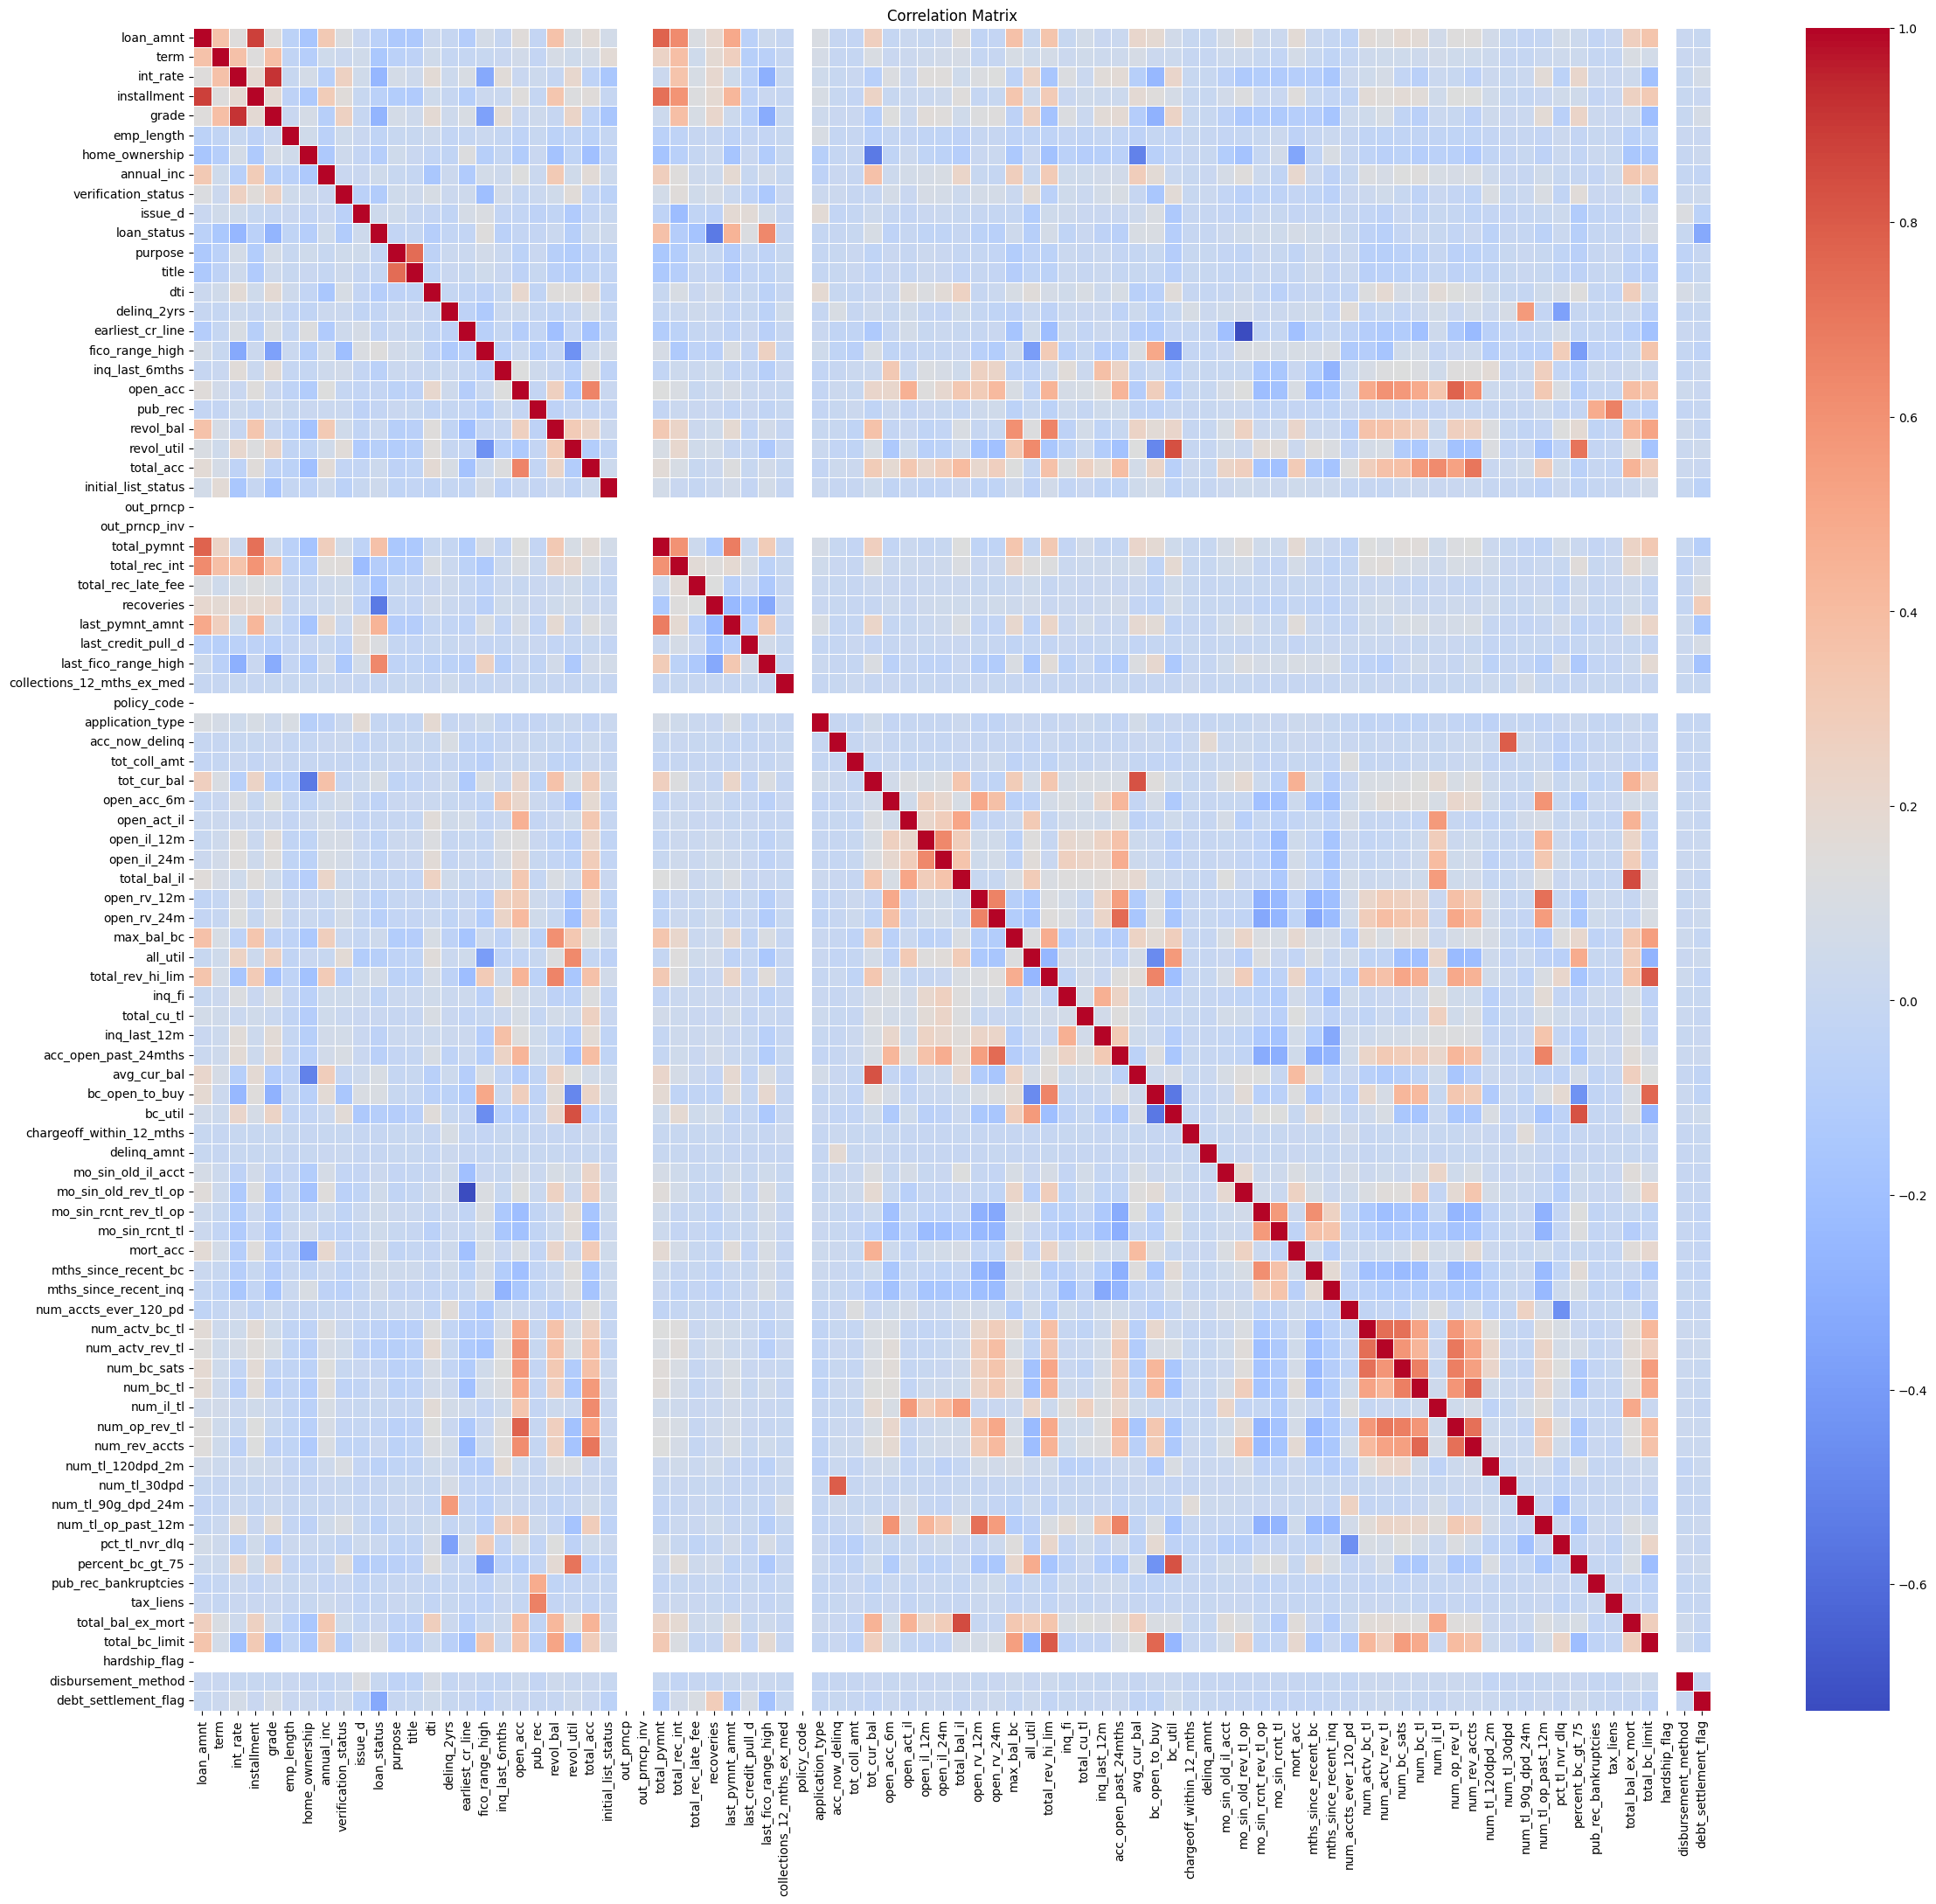

In [22]:
# Correlation Matrix
plt.figure(figsize=(28, 25))
corr_matrix = category_data.corr() 
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.1f',linewidth=.5)
plt.title('Correlation Matrix')
plt.show()


# features I am removing since they are very correlated to another variable, and there giving the same information.: 
# funded_amnt , funded_amnt_inv, sub_grade, collection_recovery_fee, fico_range_low
# , num_stats, total_pymnt_inv, total_rec_prncp, last_fico_range_low
#  tot_hi_cred_lim, total_il_high_credit_limit,  num_rev_tl_bal_gt_0

# installent very correlated to loan_amount 

# maybe:
#  either avg_cur_bal or tot_cur_bal  - also correlated to these 2 is tot_hi_cred_lim
# closely correlated: total_bal_il and total_il_high_credit_limit and total_bal_ex_mort
# total_rev_hi_lim and total_bc_imit
# num_active_rev_tl and num_rev_tl_bal_gt_0
# total_bal_ex_mort and total_il_high_credit_limit


# tot_hi_cred_lim and tot_cur_bal  -- very similar correlations  

# tot_cur_bal - Total current balance of all accounts
# avg_cur_bal - Average current balance of all accounts
# total_bal_il - Total current balance of all installment accounts
# total_il_high_credit_limit - Total installment high credit/credit limit
# total_bal_ex_mort - Total credit balance excluding mortgage
# total_rev_hi_lim  - Total revolving high credit/credit limit
# total_bc_limit - Total bankcard high credit/credit limit
# num_actv_rev_tl - Number of currently active revolving trades
# num_rev_tl_bal_gt_0 - Number of revolving trades with balance >0
# tot_hi_cred_lim - Total high credit/credit limit


# features that arent correlated to anything:

# pymnt_plan, out_prncp, out_prncp_inv, policy_code, hardship_flag